# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
from typing import Tuple
import numpy as np
from sklearn import datasets

from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns


sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

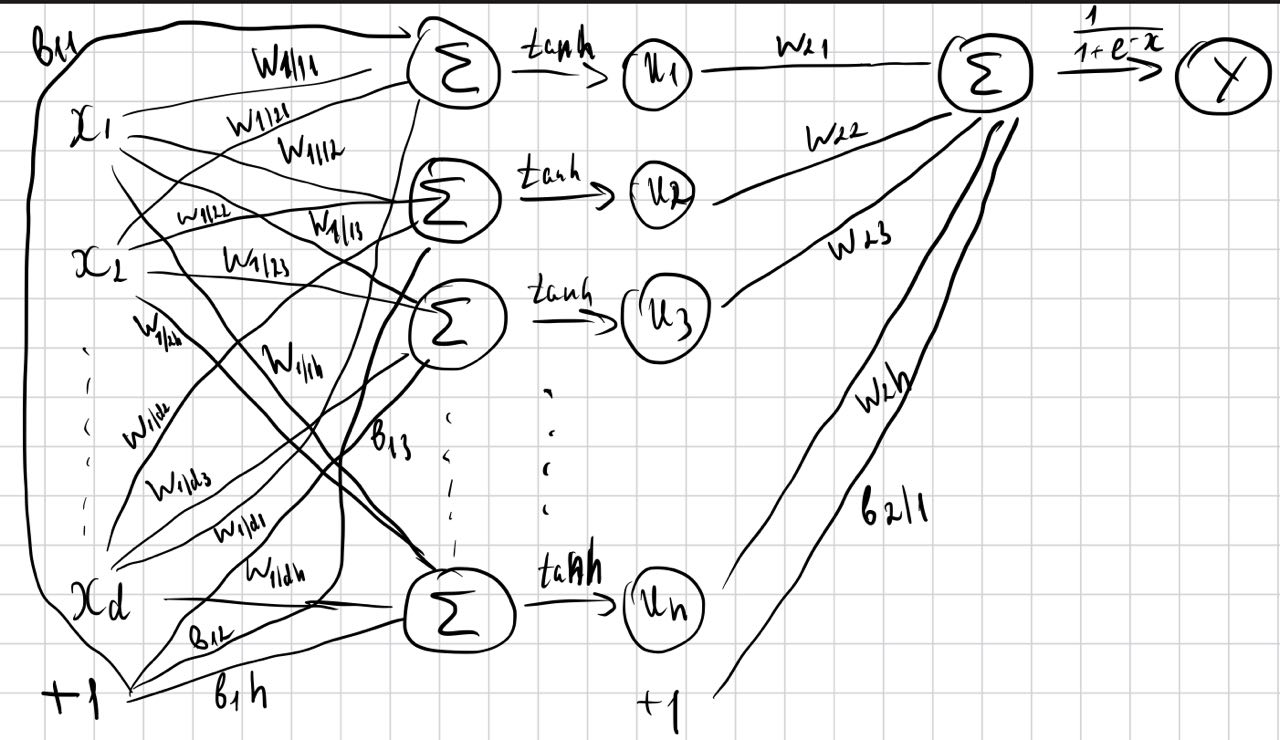

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

$$
\frac{dL}{d u_{2i}}, \frac{dL}{dS_{2i}}, \frac{du_{2i}}{dS_{2i}}, \frac{dL}{dw_{2h}}, \frac{dS_{2i}}{dw_{2h}}, \frac{dL}{db_{2}}
$$

$$
\frac{dL}{d u_{1im}}, \frac{dL}{dS_{1im}}, \frac{du_{1im}}{dS_{1im}}, \frac{dL}{dw_{1hm}}, \frac{dS_{1im}}{dw_{1hm}}, \frac{dL}{db_{1m}}
$$

**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

...

**Выводы:**

Я не расписал, но при вычислении методом обратного распространения ошибки, мы считаем производные с самого верхнего слоя(при этом сначала - по выходу, потом по параметрам). Таким образом мы использовали результаты предыдущих вычислений для вычисления текущего случая - вот и вышло O(n).

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

...

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch.
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [ ]:
# При реализации класса запрещено пользоваться ИИ-инструментами.


class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации.

    Параметры:
        input_size (int): Размер входного вектора.
        hidden_size (int): Количество нейронов в скрытом слое.
        learning_rate (float, optional): Скорость обучения (по умолчанию 0.01).
        n_epoch (int, optional): Количество эпох обучения (по умолчанию 100).
        weight_init_scale (float, optional): Масштаб для инициализации весов (по умолчанию 1).
    """

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()

        # Инициализация градиентов
        self._zero_grad()

        # Для хранения истории потерь
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями.

        Параметры:
            rows (int): Количество строк.
            cols (int): Количество столбцов.

        Возвращает:
            np.ndarray: Матрица весов.
        """
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса.

        Параметры:
            x (np.ndarray): Входной массив.

        Возвращает:
            np.ndarray: Производная функции tanh.
        """
        return ...

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду.

        Параметры:
            x (np.ndarray): Входной массив.
            scale (int, optional): Максимальное абсолютное значение для ограничения (по умолчанию 1000).

        Возвращает:
            np.ndarray: Значения сигмоиды.
        """
        x = np.clip(x, -scale, scale)  # Ограничиваем значения
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии.

        Параметры:
            y_pred (np.ndarray): Предсказанные значения (вероятности).
            y_true (np.ndarray): Истинные значения (0 или 1).

        Возвращает:
            float: Значение бинарной кросс-энтропии.
        """

        # Вычислите кросс-энтропию
        # Используйте подход с logsumexp (см. ДЗ 3, задача 5)
        loss = ...
        return loss

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды.

        Параметры:
            logits (np.ndarray): Предсказанные значения.
            y (np.ndarray): Истинные значения.

        Возвращает:
            np.ndarray: Градиент по выходу до применения сигмоиды.
        """

        # Вычислите градиент по выходу сети до применения сигмоиды.
        # Спойлер: получится очень простая формула
        return ...

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Выход сети (вероятности).
        """

        return ...

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation), накапливает градиенты.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения.
        """

        # Градиент по выходу до применения сигмоиды
        ds2 = ...

        # Градиент по параметрам 2-го слоя
        ...

        # Градиент по выходу скрытого слоя
        ...

        # Градиент по параметрам 1-го слоя
        ...

    def _step(self):
        """Обновляет веса сети на основе вычисленных градиентов."""

        # Реализуйте шаг градиентного спуска
        ...

    def _zero_grad(self):
        """Обнуляет градиенты перед следующим шагом обучения."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения на каждой итерации.

        Параметры:
            epoch (int): Номер текущей эпохи.
            plot_freq (int): Частота отрисовки графика.
        """
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            print(info_text)

        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)  # Очистка вывода
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных.

        Параметры:
            X (np.ndarray): Входные данные.
            y (np.ndarray): Истинные значения (0 или 1).
            verbose (bool, optional): Если True, выводит прогресс обучения (по умолчанию True).
            plot_freq (int, optional): Частота отрисовки графика.
                    Если 0, график не рисуется (по умолчанию 0).
        """
        y = y[:, None]
        self.loss_history = []  # Очистка истории потерь перед обучением

        for epoch in range(self.n_epoch):
            # Прямой проход по сети
            y_pred = self._forward(X)
            loss = self.binary_crossentropy(y_pred, y)
            self.loss_history.append(loss)  # Сохраняем значение потерь

            # Допишите шаги обучения
            ...

            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных.

        Параметры:
            X (np.ndarray): Входные данные.

        Возвращает:
            np.ndarray: Предсказанные классы (0 или 1).
        """
        y_pred = ...
        return (y_pred > 0.5).astype(int)  # Порог 0.5 для бинарной классификации

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам 0 и 1.

        Параметры:
        X (np.ndarray): Входные данные.

        Возвращает:
        np.ndarray: Матрица вероятностей формы (n, 2), где n — количество объектов.
                   Первый столбец — вероятность класса 0, второй — класса 1.
        """
        prob_class_1 = ...  # Вероятность класса 1
        prob_class_0 = ...  # Вероятность класса 0
        return np.hstack((prob_class_0, prob_class_1))  # Объединяем в матрицу (n, 2)

**3.** Сгенерируем искусственные данные

In [ ]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

In [ ]:
...

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу.

In [ ]:
...

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

In [ ]:
...

Немного увеличим разброс данных

In [ ]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

In [ ]:
...

**Выводы:**

...

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [ ]:
...

Обучите реализованную ранее нейронную сеть к этим данным.


In [ ]:
...

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [ ]:
...

**Выводы:**

...

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

...

Нарисуйте график функции активации и ее производной.

In [ ]:
...

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

...

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [ ]:
# При реализации нейросети запрещено пользоваться ИИ-инструментами.

...

Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

In [ ]:
...

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

In [ ]:
...

**Выводы:**

...

*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.